# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pylab as pylab
import sys
from scipy import stats
import seaborn as sns
from IPython.display import display, HTML


In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Anaconda_3_7\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


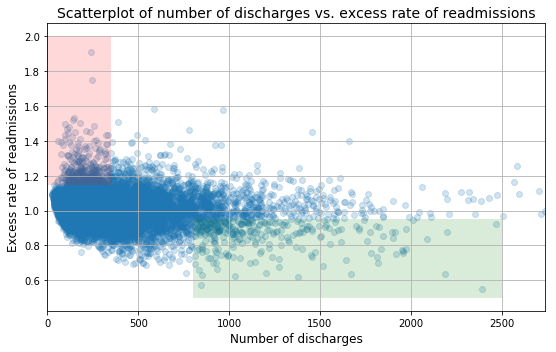

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# Your turn

In [7]:
clean_hospital_read_df['Number of Discharges'].describe()
clean_hospital_read_df.info()
clean_hospital_read_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


### Let's start by analyzing the report.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges

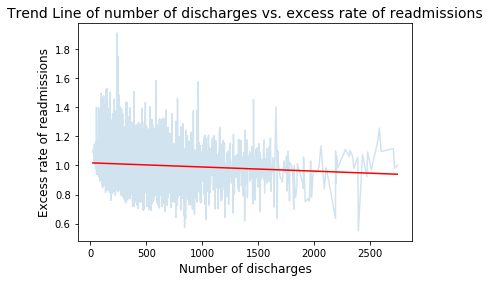

In [8]:
# plotting a trend line for Number of Discharges vs Excess rate of readmissions
pylab.plot(x, y,alpha=0.2)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r")
_ = plt.xlabel('Number of discharges', fontsize=12)
_ = plt.ylabel('Excess rate of readmissions', fontsize=12)
_ = plt.title('Trend Line of number of discharges vs. excess rate of readmissions', fontsize=14)
plt.show()

> Yes, the overall trend seems to be trending down as seen in the plot above.

**A. Initial observations based on the plot above**
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

> Yes, based on the scatter plot, the results seems to agree with above statements.

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [9]:
pd.options.mode.chained_assignment = None  # default='warn'

# Calculate means, number of discharges < 100
less_100_df = clean_hospital_read_df['Excess Readmission Ratio'].dropna()
less_100_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100]
less_100_mean_exrrate = less_100_df['Excess Readmission Ratio'].mean()
print('In hospitals with number of discharges < 100, mean excess readmission rate: {}\n'.format(round(less_100_mean_exrrate,3)))          

# Calculate ratios, number of discharges < 100
less_100_df['t_f_exs_1'] = np.where(less_100_df['Excess Readmission Ratio'] > 1, 'T','F')
exces_1_ratio = np.sum(less_100_df[less_100_df['t_f_exs_1']=='T'].groupby('t_f_exs_1')['Excess Readmission Ratio'].count())/np.sum(less_100_df.groupby('t_f_exs_1')['Excess Readmission Ratio'].count())
print('Excess Readmission Rate greater than: {}%\n'.format(100*round(exces_1_ratio,4)))

# Calculate means, number of discharges > 1000
greatr_1000_df = clean_hospital_read_df['Excess Readmission Ratio'].dropna()
greatr_1000_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000]
greatr_1000_mean_exrrate = greatr_1000_df['Excess Readmission Ratio'].mean()
print('In hospitals with number of discharges > 1000, mean excess readmission rate: {}\n'.format(round(greatr_1000_mean_exrrate,3)))          

# Calculate ratios, number of discharges > 1000
greatr_1000_df['t_f_exs_1'] = np.where(greatr_1000_df['Excess Readmission Ratio'] > 1, 'T','F')
excess_1_ratio = np.sum(greatr_1000_df[greatr_1000_df['t_f_exs_1']=='T'].groupby('t_f_exs_1')['Excess Readmission Ratio'].count())/np.sum(greatr_1000_df.groupby('t_f_exs_1')['Excess Readmission Ratio'].count())
print('Excess Readmission Rate greater than: {}%\n'.format(100*round(excess_1_ratio,4)))

In hospitals with number of discharges < 100, mean excess readmission rate: 1.023

Excess Readmission Rate greater than: 63.22%

In hospitals with number of discharges > 1000, mean excess readmission rate: 0.978

Excess Readmission Rate greater than: 44.49%



> The based on the analysis these statements are true as well.

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

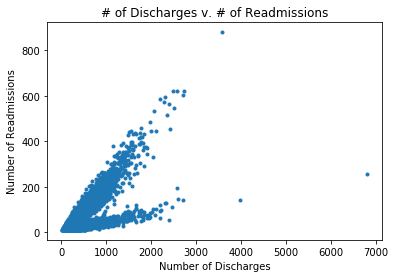

pearson correlation coefficient: 0.7912724087040406


In [10]:
df_1 = clean_hospital_read_df[clean_hospital_read_df['Number of Readmissions'].notnull() & clean_hospital_read_df['Number of Discharges'].notnull()] 
_ = plt.plot( df_1['Number of Discharges'],df_1['Number of Readmissions'] , marker = '.', linestyle = 'none')
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Number of Readmissions')
_ = plt.title('# of Discharges v. # of Readmissions')
plt.show()

# Compute pearson correlation
r = np.corrcoef(df_1['Number of Discharges'],df_1['Number of Readmissions'])
print('pearson correlation coefficient: {}'.format(r[0,1]))

,Number of Discharges,Number of Readmissions,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
Number of Discharges,1.000000,0.791272,-0.097398,-0.135163,-0.131091
Number of Readmissions,0.791272,1.000000,0.117600,0.361033,0.330527
Excess Readmission Ratio,-0.097398,0.117600,1.000000,0.200039,-0.031104
Predicted Readmission Rate,-0.135163,0.361033,0.200039,1.000000,0.965420
Expected Readmission Rate,-0.131091,0.330527,-0.031104,0.965420,1.000000


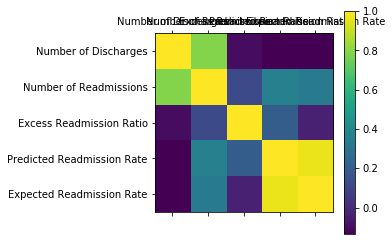

In [11]:
# Compute the Correlation matrix: covariance_matrix
df_2 = df_1[['Number of Discharges', 'Number of Readmissions','Excess Readmission Ratio', 'Predicted Readmission Rate','Expected Readmission Rate']]

df_2.corr()
# displaying Correlation between variables
display(df_2.corr())

# Correlation Plot
plt.matshow(df_2.corr())
plt.xticks(range(len(df_2.columns)), df_2.columns)
plt.yticks(range(len(df_2.columns)), df_2.columns)
plt.colorbar()
plt.show()

> There seems to be correlation between Number of discharges and Number of Readmissions, not sure about Expected Readmissions Rate and Predicted Readminssion rates as they are negitively correlating.

C:\Anaconda_3_7\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Anaconda_3_7\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda_3_7\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


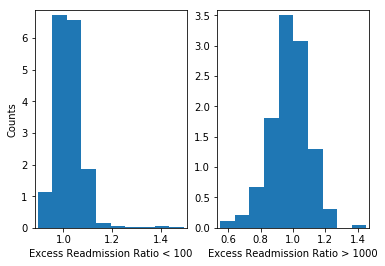

In [12]:
plt.subplot(1,2,1)
#plot hist for small hosptials
ax1 = plt.hist(less_100_df['Excess Readmission Ratio'],normed=True)
ax1 = plt.xlabel('Excess Readmission Ratio < 100')
ax1 = plt.ylabel('Counts')
ax1 = plt.margins(0.02)

plt.subplot(1,2,2)
#plot hist for large hosptials
ax2 = plt.hist(greatr_1000_df['Excess Readmission Ratio'],density=True)
ax2 = plt.xlabel('Excess Readmission Ratio > 1000')
ax2 = plt.margins(0.02)
_ = plt.show

In [13]:
less_100_df_1 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges']<100) & (clean_hospital_read_df['Number of Discharges'] > 0)]
print('# of samples for less that 100 sample size is: {}\n# of samples for greater than 1000 :{}'.format(len(less_100_df_1),len(greatr_1000_df)))

# of samples for less that 100 sample size is: 1188
# of samples for greater than 1000 :463


In [14]:
less_100_df_1.mean()

Provider Number               252180.113636
Number of Discharges              74.717172
Footnote                                NaN
Excess Readmission Ratio           1.022618
Predicted Readmission Rate        20.033923
Expected Readmission Rate         19.631987
Number of Readmissions            15.930135
dtype: float64

In [15]:
less_100_df_1.std()

Provider Number               158310.889162
Number of Discharges              16.908819
Footnote                                NaN
Excess Readmission Ratio           0.057979
Predicted Readmission Rate         3.021217
Expected Readmission Rate          2.865923
Number of Readmissions             4.282485
dtype: float64

In [16]:
greatr_1000_df.mean()

Provider Number               251570.626350
Number of Discharges            1383.427646
Footnote                                NaN
Excess Readmission Ratio           0.978335
Predicted Readmission Rate        16.061555
Expected Readmission Rate         16.106695
Number of Readmissions           216.192225
dtype: float64

In [17]:
greatr_1000_df.std()

Provider Number               136147.064112
Number of Discharges             459.109724
Footnote                                NaN
Excess Readmission Ratio           0.120007
Predicted Readmission Rate         8.142111
Expected Readmission Rate          7.712576
Number of Readmissions           128.659606
dtype: float64

#### Hypothesis Testing

> H0: There is no difference between the two groups less than 100 facilities and one with greater than 1000 facilities
> HA: There is difference between the two groups less than 100 facilities and one with greater than 1000 facilities

> Setup an appropriate hypothesis test.
  > 2. Compute and report the observed significance value (or p-value).
  >  3. Report statistical significance for $\alpha$ = .01. 
  >  4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

In [18]:
stats.ttest_ind(less_100_df_1['Excess Readmission Ratio'], greatr_1000_df['Excess Readmission Ratio'], equal_var=True)

Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)

> p value is < 0.01 so we can reject the null hypothesis

In [36]:
# calculate the t_critical value with q = 0.975 since its distribution has two tails and df of n1 + n2 -2
deg_free = (len(less_100_df_1) -1) + (len(greatr_1000_df) - 1)
t_critical = stats.t.ppf(q = 0.975, df=deg_free)

print('t_critical value: {:0.5}\n'.format(t_critical))

t_critical value: 1.9614



> Boostrap Hypothesis testing.

In [37]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute the observed difference in means of hospitals less than 100 and greater than 1000: diff_obs
diff_obs = diff_of_means(less_100_df_1['Excess Readmission Ratio'],greatr_1000_df['Excess Readmission Ratio'])

# Acquire 10,000 permutation replicates of difference in mean: perm_replicates
perm_replicates = draw_perm_reps(less_100_df_1['Excess Readmission Ratio'], greatr_1000_df['Excess Readmission Ratio'], diff_of_means, 10000)


# Compute and print the p-value: p
p_value = np.sum(perm_replicates >= diff_obs) / len(perm_replicates)
print('p-val :{}\n'.format(p_value))


# Compute the CI
ci_95 = np.percentile(perm_replicates,[2.5,97.5])
print('95% Confidence Interval:{}\n'.format(ci_95))

# Print the Margin of Error
margin_or_err = (ci_95[0] - ci_95[1])/2
print('Margin of Error:{}\n'.format(margin_or_err))

if p_value < 0.05:
    print("Reject Null Hypothesis and Accept Alternate Hypothesis\n")
else:
    print('Fail to Reject Null Hypothesis')


p-val :0.0

95% Confidence Interval:[-0.00882515  0.00879195]

Margin of Error:-0.008808551025009156

Reject Null Hypothesis and Accept Alternate Hypothesis



#### 2nd Hypothesis Test
> H0: There is no correlation between Number of Discharges and Number of Readmissions <br>
> HA: There is correlation between Number of Discharges and Number of Readmissions.

In [38]:
r = stats.pearsonr(df_1['Number of Discharges'], df_1['Number of Readmissions'])
z = np.arctanh(r)
SD_z = 1 / np.sqrt(len(df_1['Number of Discharges']) - 3)
z_upper = z + 1.96 * SD_z
z_lower = z - 1.96 * SD_z
r_upper = np.tanh(z_upper)
r_lower = np.tanh(z_lower)

print(z_upper[0],z_lower[0])
print(r_upper[0], r_lower[0])

1.0931076031824025 1.0565438750910734
0.7980095679676499 0.7843374921167651


#### What are the advantages and disadvantages of using this plot to convey information?

> The scatter plot show the correlation between the two points which is good, however, there are just too many data points plotted on that plot and also the red and green distinction does not convey the point.<br>
> Another way to plot the scattor plot which has too many points plotted which I thought is by showing the scatter plots in different groups that could help tell the story better.

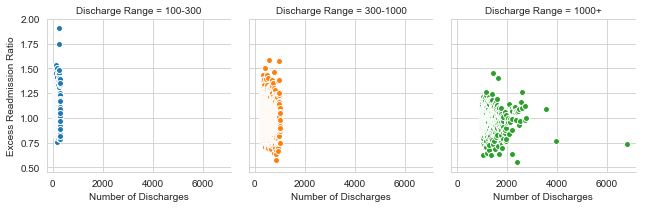

In [33]:
# Use seaborn for easy faceting
sns.set_style("whitegrid")
bins = [100, 300, 1000,  np.inf]
names = ['100-300', '300-1000', '1000+']

df_1.loc[:,'Discharge Range'] = pd.cut(df_1['Number of Discharges'], bins, labels=names)
g = sns.FacetGrid(df_1, col="Discharge Range", hue="Discharge Range")
g = (g.map(plt.scatter, "Number of Discharges", "Excess Readmission Ratio", edgecolor="w"))
plt.show()


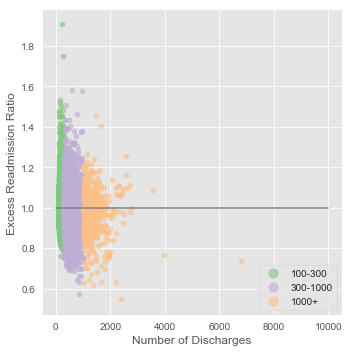

In [34]:
# Plot
plt.style.use(['ggplot'])
sns.lmplot( x="Number of Discharges", y="Excess Readmission Ratio", data=df_1, fit_reg=False, hue='Discharge Range', legend=False, palette="Accent", scatter_kws={"alpha":0.6,"s":20} )
plt.plot([0,10000], [1,1], 'grey')
# Legend
plt.legend(loc='lower right', markerscale=2)
 
# titles
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.show()